# Qiskit 설치 및 수업 준비

## 필수 패키지 설치

최신 버젼의 Qiskit을 설치하는 것! 헷갈리신다면 다음의 순서를 따라해보세요 

1. [아나콘다 설치](https://www.anaconda.com/)

    1-1. 만약 오래된 아나콘다가 설치되어 있다면 터미널을 열어 다음의 명령어를 실행해 보세요

    `conda update -n base conda`
    
2. 환경 만들기

`conda create -n qiskit python=3.10`

3. 쥬피터 노트북 혹은 쥬피터 랩 설치

`conda install jupyter notebook` 혹은 `conda install jupyterlab`

4. qiskit_ibm_provider 설치

`pip install qiskit qiskit_ibm_provider`

5. qiskit-ibm-runtime 설치

`pip install qiskit-ibm-runtime`

6.  Qiskit 설치 (머신러닝, 파이낸스 등 모든 라이브러리 한번에 설치)

`pip install qiskit[all]`

## 패키지 설치 확인
설치가 잘 되었는지 다음의 명령어를 실행해서 확인해 봅시다.

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

In [3]:
# 필수 라이브러리 불러오기 

import numpy as np
import pandas as pd
from math import sqrt, pi

from qiskit import *
from qiskit.visualization import plot_histogram, plot_distribution, plot_error_map
from qiskit.visualization.array import array_to_latex

from qiskit.quantum_info import hellinger_fidelity, random_statevector


from qiskit_ibm_provider import IBMProvider

from qiskit_aer import AerSimulator


# Plotting tools
import matplotlib.pyplot as plt

## 실습을 위한 계정 설정 및 백엔드 설정

실습을 위한 계정 설정을 해봅시다. 토큰은 https://quantum-computing.ibm.com/ 에서 복사해 옵니다.

<img src="img/token.png" alt="Alternative text" width=800/>

In [95]:
#IBMProvider.save_account("Your_Token", overwrite=True)
#provider = IBMProvider()

#밋업을 위해 추가된 허브와 그룹, 프로젝트를 프로바이더에 설정
provider = IBMProvider(instance="ibm-q-yonsei/internal/qc-and-simulatio")

In [5]:
provider.backends() #5 27Q Backends

[<IBMBackend('ibm_geneva')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibm_auckland')>,
 <IBMBackend('ibm_hanoi')>]

수업을 위해 제공되는 5개의 27 큐비트 백엔드들 중 가장 적은 Queue를 지닌 백엔드를 찾아 실습을 위한 백엔드로 설정합니다. 

In [96]:
from qiskit_ibm_provider import least_busy

backend = least_busy(provider.backends())
backend

<IBMBackend('ibm_geneva')>

## 수업 중간중간 사용할 퀴즈 플랫폼 로그인

Representing qubit states 와 Single qubit gates 파트에 있는 퀴즈와 연습 문제를 기반으로 라이브 퀴즈 쇼를 함께 진행해 봅시다 :) 

<h3>모두 로그인해주세요!</h3>

수업을 모두 마친후 최상위 5인에게는 종강전에 특별 기념품을 보내드립니다! 기대하세요!

https://ahaslides.com/ZD03X 

<img src="img/quiz.png" alt="Alternative text" width=800/>

# 자주 사용하게 될  유용한 Python 잠시 살펴보기

1. list를 만드는 유용한 방법

이름이 a인 다음의 리스트를 만들어 보세요: [2,3,4,5,6]

In [7]:
# define with value
a = [2, 3, 4, 5, 6]
a

[2, 3, 4, 5, 6]

In [8]:
# use range()
a = list(range(2, 7))
a

[2, 3, 4, 5, 6]

In [9]:
# use append() and for loop
a = []
for N in range(2,7):
    a.append(N)
a

[2, 3, 4, 5, 6]

2. Dictionary 를 다루는 법

a 라는 이름의 다음의 key 와 value를 갖는 dictionary를 만들어 보세요 

| key | value | 
| --- | --- |
| '00' | 10 |
| '11' | 1014 |

In [10]:
#define
a = {'00': 10, '11': 1014}
a

{'00': 10, '11': 1014}

In [11]:
#add key and value
a = {}
             # dic이라는 이름으로 비어있는 딕셔너리를 만든다.
a['00'] = 10
a['11'] = 1014

a

{'00': 10, '11': 1014}

만들어진 dictionary의 '00' key의 값을 가져와 봅시다.

In [13]:
a['11']

1014

만들어진 dictionary의 key 값만을 출력해 봅시다. 또한 value 값만을 출력해 봅시다.

In [14]:
print(a.keys()) 
print(a.values()) 

dict_keys(['00', '11'])
dict_values([10, 1014])


Dictionary 에 '01' 인 키가 있는지 없는지 확인해 봅시다.



In [15]:
'01' in a

False

Dictionary에 '11'인 키가 있는지 없는지 확인해 봅시다.

In [16]:
'11' in a

True

3. 행렬을 만들고 다루기

임의의 Bra, Ket 행렬 만들어 보기

$$a = \begin{bmatrix} 0 & 1 \end{bmatrix}, b = \begin{bmatrix} 0 \\1 \end{bmatrix}$$
를 만들어 봅시다.

In [18]:
# row matrix, column matrix 만들기
a = [[0, 1]]
#a
array_to_latex(a)


<IPython.core.display.Latex object>

In [19]:
b = [[0],[1]]
array_to_latex(b)

<IPython.core.display.Latex object>

numpy를 이용하여 R이란 이름의 2x2 랜덤 행렬을 만들고 각각의 row값과 column 값을 list 로 저장해 봅시다.

In [20]:
R = np.random.rand(2,2)
array_to_latex(R)

<IPython.core.display.Latex object>

In [21]:
R_row0 = R[0,:]
array_to_latex(R_row0)

<IPython.core.display.Latex object>

In [22]:
R_row1 = R[1,:]
array_to_latex(R_row1)

<IPython.core.display.Latex object>

In [23]:
R_col0 = R[:,[0]]
array_to_latex(R_col0)

<IPython.core.display.Latex object>

In [24]:
R_col1 = R[:,[1]]
array_to_latex(R_col1)

<IPython.core.display.Latex object>

4. 간단한 함수를 만들어 봅시다

2x2 행렬을 입력으로 받아서 각각의 row와 column을 반환하는 함수를 만들어 봅시다.

In [25]:
def slice_matrix( Input ):
    row0 = Input[0,:]
    row1 = Input[1,:]
    col0 = Input[:,[0]]
    col1 = Input[:,[1]]
    return row0, row1, col0, col1

In [26]:
R = np.random.rand(2,2)
array_to_latex(R)


<IPython.core.display.Latex object>

In [27]:
result = slice_matrix(R)
for a in result:
    display(array_to_latex(a))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

위에서 만들어진 리스트들을 사용하여, 행렬간의 덧셈, 뺄셈, 상수 곱셈, 내적을 해봅시다.

In [31]:
array_to_latex(result[0] + result[1])

<IPython.core.display.Latex object>

In [29]:
array_to_latex(result[2] + result[3])

<IPython.core.display.Latex object>

In [32]:
array_to_latex(5 * result[0])

<IPython.core.display.Latex object>

In [33]:
np.matmul(result[0], result[2])

array([0.89230125])

In [34]:
np.matmul(result[0], result[2]).item()

0.8923012538238024

In [35]:
type(np.matmul(result[0], result[2]).item())

float

5. 복소수 행렬을 정의해 봅시다.

$$c1 = \begin{bmatrix} 1 + 2i & 3+ 6i \end{bmatrix},c2 = \begin{bmatrix} 3 - i \\ 2 + i \end{bmatrix}$$ 를 정의하고 내적을 계산해 봅시다./

In [37]:
c1 = [[1 + 2j, 3 + 6j]]
c2 = [[3 - 1j],[2 + 1j]]
type(np.matmul(c1, c2).item())

complex

# Representing Qubit States
## 1. Classical vs Quantum Bits

1 큐비트로 구성된 양자 회로를 만들고 임의의 상태로 큐비트를 초기화 시킨 후 Aer simulator를 사용해 20000 측정한 결과를 plot 해 봅시다.

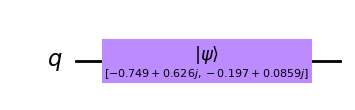

In [38]:

qc = QuantumCircuit(1)
initial_state = random_statevector(2)   
qc.initialize(initial_state, 0)

qc.draw('mpl') 

이 회로의 Statevector를 계산하는 방법은 여러가지가 있습니다. 가장 먼저 quantum_info 라이브러리를 사용하는 방법을 소개합니다.

In [39]:
from qiskit.quantum_info import Statevector

array_to_latex(Statevector(qc))

<IPython.core.display.Latex object>

In [41]:
#without measurement, use StatevectorSimulator

from qiskit_aer import StatevectorSimulator

backend = StatevectorSimulator()
array_to_latex(backend.run(qc).result().get_statevector())

<IPython.core.display.Latex object>

In [42]:
qc.save_statevector()

In [46]:
#without measurement, use AerSimulator and save_statevector()

backend = AerSimulator()
backend.run(qc).result().data(0)['statevector']


Statevector([-0.74918373+0.62638553j, -0.19744948+0.08589883j],
            dims=(2,))


이 회로에 measurement를 추가하고, 시뮬레이터와 real_backend에서 실행해 봅시다.

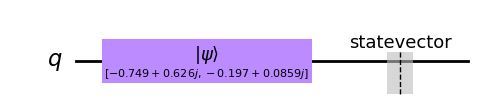

In [47]:
qc.draw('mpl')

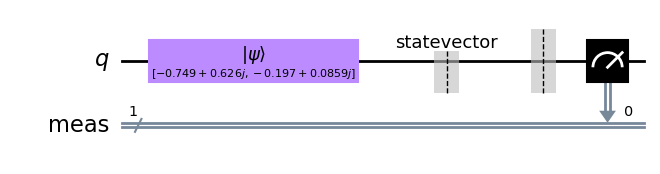

In [48]:
qc.measure_all()
qc.draw('mpl')

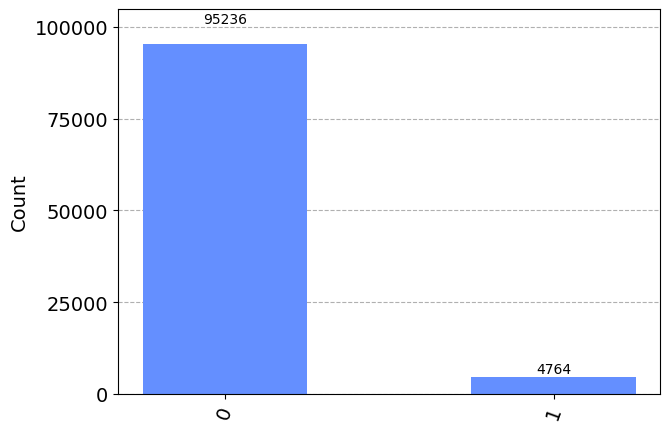

In [50]:
backend = AerSimulator()
counts = backend.run(qc, shots=100000).result().get_counts()
plot_histogram(counts)


1 큐비트로 구성된 양자 회로를 만들고 임의의 상태$|q_0\rangle = \frac{1}{\sqrt{2}}|0\rangle + i\frac{1}{\sqrt{2}}|1\rangle$로 큐비트를 초기화 시킨 후 Aer simulator를 사용해 20000 측정한 결과를 plot 해 봅시다.

In [55]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector()
qc.measure_all()
backend = AerSimulator()
result = backend.run(qc, shots=20000).result()
state= result.get_statevector() 
array_to_latex(state)# Print the result

<IPython.core.display.Latex object>

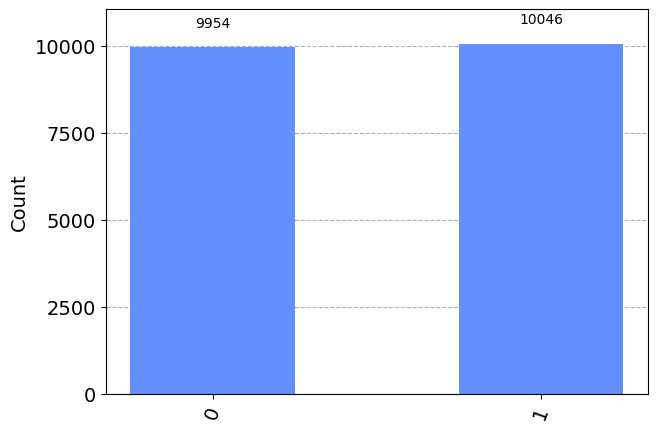

In [56]:
counts = result.get_counts()
plot_histogram(counts)

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 퀴즈 1번, 2번, 3번, 4번을 풀고 노트북으로 돌아옵시다! </div>

## 2. The Rules of Measurement

$|q_0\rangle = \frac{1}{\sqrt{2}}|0\rangle + i\frac{1}{\sqrt{2}}|1\rangle$인 상태의 0 또는 1로 측정될 확률을 행렬의 내적을 사용해 계산해 봅시다.

In [57]:
initial_state = [[1/sqrt(2)], [1j/sqrt(2)]]
array_to_latex(initial_state)

<IPython.core.display.Latex object>

큐비트의 계산 기저 |0> 과 |1> 을 각각 다음과 같이 정의합니다.

In [58]:
ket0 = [[1], [0]]
display(array_to_latex(ket0))
ket1 = [[0], [1]]
display(array_to_latex(ket1))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

$\langle 0 | q_0 \rangle $을 계산해 봅시다.

In [59]:
inner_product = np.matmul(np.transpose(ket0), initial_state)
inner_product.item()

(0.7071067811865475+0j)

$ | \langle 0 | q_0 \rangle|^2 $을 계산해 봅시다.

In [60]:
(np.abs(inner_product) ** 2).item()


0.4999999999999999

### Normalization

Statevector는 최종 측정확률이 1이 된다는 제약을 지니기 때문에, 다음을 항상 만족하게 됩니다
$$\langle \psi | \psi \rangle = 1$$
따라서,  $|\psi \rangle = \alpha |0\rangle + \beta|1\rangle$ 일때 $|\alpha|^2 + |\beta|^2 = 1$ 을 만족하게 됩니다.

다음에서 random statevector를 생성하여 위의 normalization 이 성립하는지 확인해 보고, normalization을 만족하지 않는 statevector를 사용할 경우 양자회로가 초기화 되지 않는 것을 확인해 봅시다.

In [61]:
#random_statevector 를 사용해서 normalization이 성립하는 지 확인

initial_state = random_statevector(2) 
np.abs(initial_state.data[0])**2 + np.abs(initial_state.data[1])**2

1.0

In [63]:
#임의의 initial state를 만들어서 회로에 사용할 수 없음을 확인
rand_init= np.random.rand(2)
np.abs(rand_init[0])**2 + np.abs(rand_init[1])**2

0.03721164837997491

In [64]:
qc = QuantumCircuit(1)
qc.initialize(rand_init, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

Exercise: 
- Create a state vector that will give a 1/3 probability of measuring |0>.
- Create a different state vector that will give the same measurement probabilities.
- Verify that the probability of measuring |1> for these two states is 2/3.

<div class="aalert alert-block alert-danger">    
    3분 동안 만들어봅시다!  </div>

In [65]:
from IPython.display import IFrame

# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/B84tAaqC6Bc", title="YouTube video player", frameborder="0", allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share")

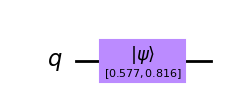

In [66]:
#Sophy's Solution

from qiskit.quantum_info import Statevector

initial_state = [sqrt(1/3),sqrt(2/3)]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)

qc.draw('mpl') 


In [67]:
state = Statevector.from_instruction(qc)
probs = state.probabilities()
print('probs: {}'.format(probs))

probs: [0.33333333 0.66666667]


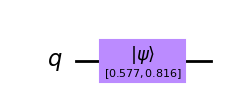

In [68]:
initial_state2 = [-sqrt(1/3),-sqrt(2/3)]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.draw('mpl')

In [69]:
state = Statevector.from_instruction(qc)
probs = state.probabilities()
print('probs: {}'.format(probs))

probs: [0.33333333 0.66666667]


### Alternative measurement

측정을 위한 기저는 반드시 계산기저 일 필요는 없습니다. 자세한 내용은 single qubit gate에서 다룹니다.

### Global Phase

다음의 관계를 갖는 세가지 statevector를 가정해 봅시다.
$$|\psi_0 \rangle, |\psi_1 \rangle = -|\psi_0 \rangle, |\psi_2 \rangle = i|\psi_0 \rangle$$


이 세 가지 statevector는 "Global phase의 차이만 가지고 있다"고 표현하며, 측정을 하거나, 임의의 Unitary를 적용한 후 측정해도 그 측정 확률이 동일하여 구분이 불가능합니다. 이러한 성질을 코딩 실습으로 확인해 봅시다.

In [70]:
psi0 = random_statevector(2) 
psi1 = -psi0
psi2 = -1j * psi0
print(psi0, " ", psi1, " ", psi2)

Statevector([ 0.4363536-0.41727374j, -0.7837772-0.14550413j],
            dims=(2,))   Statevector([-0.4363536+0.41727374j,  0.7837772+0.14550413j],
            dims=(2,))   Statevector([-0.41727374-0.4363536j, -0.14550413+0.7837772j],
            dims=(2,))


In [71]:
qc = QuantumCircuit(1)
qc.initialize(psi0, 0)
state = Statevector.from_instruction(qc)
probs = state.probabilities()
print('probs: {}'.format(probs))

probs: [0.36452184 0.63547816]


In [72]:
qc = QuantumCircuit(1)
qc.initialize(psi1, 0)
state = Statevector.from_instruction(qc)
probs = state.probabilities()
print('probs: {}'.format(probs))

probs: [0.36452184 0.63547816]


In [73]:
qc = QuantumCircuit(1)
qc.initialize(psi2, 0)
state = Statevector.from_instruction(qc)
probs = state.probabilities()
print('probs: {}'.format(probs))

probs: [0.36452184 0.63547816]


In [74]:
from qiskit.quantum_info import random_unitary
num_qubits = 1
U = random_unitary(2 ** num_qubits)
array_to_latex(U)

<IPython.core.display.Latex object>

In [75]:
Upsi0 = np.matmul(U, psi0)
Upsi1 = np.matmul(U, psi1)
Upsi2 = np.matmul(U, psi2)
print(Upsi0, " ", Upsi1, " ", Upsi2)

[-0.54893966-0.48013088j  0.24997199+0.6369094j ]   [ 0.54893966+0.48013088j -0.24997199-0.6369094j ]   [-0.48013088+0.54893966j  0.6369094 -0.24997199j]


In [76]:
qc = QuantumCircuit(1)
qc.initialize(Upsi0, 0)
state = Statevector.from_instruction(qc)
probs = state.probabilities()
print('probs: {}'.format(probs))

probs: [0.53186042 0.46813958]


In [77]:
qc = QuantumCircuit(1)
qc.initialize(Upsi1, 0)
state = Statevector.from_instruction(qc)
probs = state.probabilities()
print('probs: {}'.format(probs))

probs: [0.53186042 0.46813958]


In [78]:
qc = QuantumCircuit(1)
qc.initialize(Upsi2, 0)
state = Statevector.from_instruction(qc)
probs = state.probabilities()
print('probs: {}'.format(probs))

probs: [0.53186042 0.46813958]


양자 회로를 구성하여 확인해봅시다! psi0에 대해서만 확인해 보겠습니다!

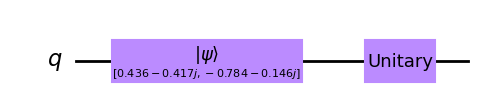

In [79]:
qc0 = QuantumCircuit(1)
qc0.initialize(psi0, 0)
qc0.unitary(U, 0)
qc0.draw('mpl')

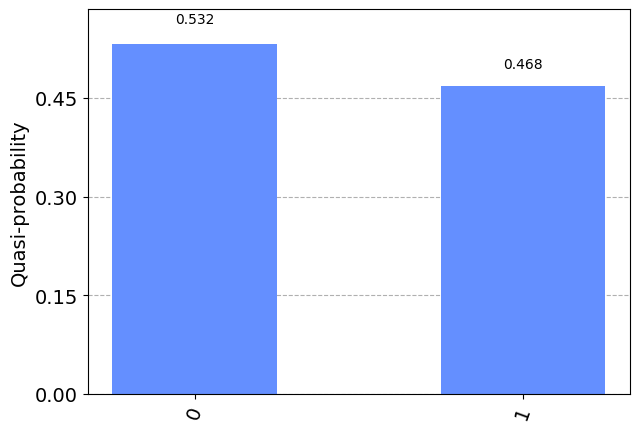

In [80]:
backend = StatevectorSimulator()
counts = backend.run(qc).result().get_counts()
plot_histogram(counts)

<div class="aalert alert-block alert-danger">    
psi1, psi2에 대해서 위와 같이 U게이트를 적용하는 양자 회로를 작성하고 counts를 plot 해보세요!  </div>


In [ ]:
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )

### The Observer Effect

큐비트는 여러가지 중첩 가능한 상태로 초기화 되어 사용 될 수 있습니다. 하지만 한번 측정되고 난 후에는 $|0\rangle$이나 $|1\rangle$로 그 상태가 결정됩니다. 이것을 측정이 큐비트의 상태를 0또는 1로 붕괴시킨다고 표현하곤 합니다. 

다음의 실습에서 measurement를 포함하거나 포함하지 않은, 두가지 회로를 구성하고, 각 경우 최종 회로의 statevector값을 확인해 봅시다. 큐비트의 초기 값은  0과 1로 측정될 확률이 각각 50%에 해당하는 텍스트북에 제시된 상태를 사용하도록 하겠습니다.

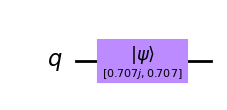

In [81]:
#측정이 없는 회로
qc_without_measurment = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc_without_measurment.initialize(initial_state, 0)
qc_without_measurment.draw('mpl')

In [82]:
backend = StatevectorSimulator()
backend.run(qc_without_measurment).result().get_statevector()

Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


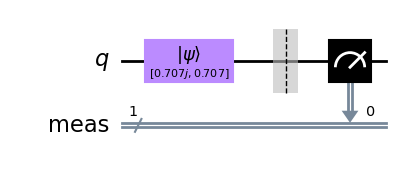

In [83]:
qc_with_measurment = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc_with_measurment.initialize(initial_state, 0)
qc_with_measurment.measure_all()
qc_with_measurment.draw('mpl')

In [86]:
backend = StatevectorSimulator()
backend.run(qc_with_measurment, shots=1).result().get_statevector()

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


바로 위의 셀을 여러번 실행시켜 보면 statevector의 값이 0 또는 1에 해당하게 계속 변하는 것을 볼수있습니다. 마치 동전던지기와 같습니다 :)

### A Note about Quantum Simulators

`qiskit_aer`는 Qiskit의 시뮬레이션 패키지로, 다음과 같은 시뮬레이터 들을 보유하고 있습니다
- [AerSimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.AerSimulator.html#qiskit_aer.AerSimulator)
- [QasmSimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.QasmSimulator.html#qiskit_aer.QasmSimulator)
- [StatevectorSimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.StatevectorSimulator.html#qiskit_aer.StatevectorSimulator)
- [UnitarySimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.UnitarySimulator.html#qiskit_aer.UnitarySimulator)

이 중 `AerSimulator`는 회로를 실행하고 측정된 값의 count를 반환합니다. 노이즈가 없는 이상적인 시뮬레이션을 하며 실행의 기본값은 `shots=1024`로 회로를 1024번 실행하도록 하고 있습니다. 

### Bloch Sphere vs QSphere

Qiskit은 양자 상태를 visual하고, 직관적으로 보여주기 위해 세가지 라이브러리를 제공하고 있습니다. 
- [plot_bloch_vector](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_vector.html) (입력이 구면의 좌표, Cartesian or Spherical)
- [plot_bloch_multivector](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html) (입력이 statevector)
- [plot_state_qsphere](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html) (입력이 statevector)

다음의 실습에서는 임의의 양자상태를 생성하고, 세가지 라이브러리를 사용해 큐비트의 상태를 표현해 보도록 하겠습니다.


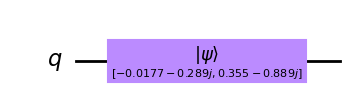

In [87]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_vector, plot_bloch_multivector

qc = QuantumCircuit(1)
initial_state = random_statevector(2) 
qc.initialize(initial_state, 0)

qc.draw('mpl')

In [88]:
def get_spherical_coordinates(statevector):
    # Convert to polar form:
    r0 = np.abs(statevector[0])
    ϕ0 = np.angle(statevector[0])

    r1 = np.abs(statevector[1])
    ϕ1 = np.angle(statevector[1])

    # Calculate the coordinates:
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

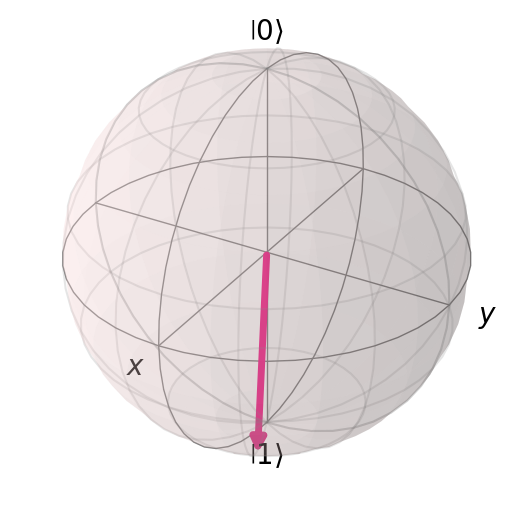

In [89]:
plot_bloch_vector(get_spherical_coordinates(initial_state), coord_type = 'spherical')

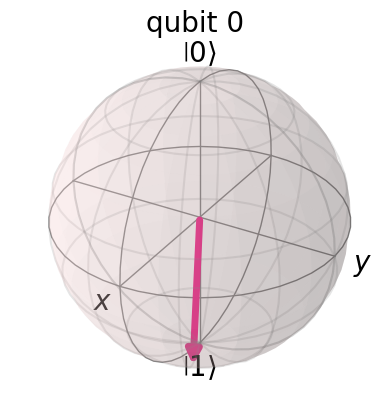

In [91]:
plot_bloch_multivector(qc)

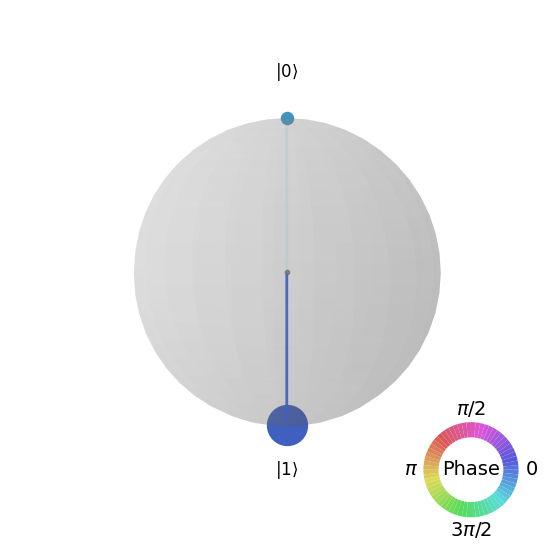

In [93]:
plot_state_qsphere(qc)

각각의 방법은 Single Qubit회로, Multi Qubit 회로 등, 각각의 상황에 따라, 목적에 따라 편리하게 이용할 수 있습니다. 참고로 IBM Quantum Cloud의 Circuit composer는 QSphere를 사용하고 있습니다.

# 퀴즈를 시작하기 전! Real Backend 실습

27개의 큐비트를 모두 중첩시켜서 24비트의 난수를 10000개 발생시켜서 100x100이미지를 만들어 봅시다.


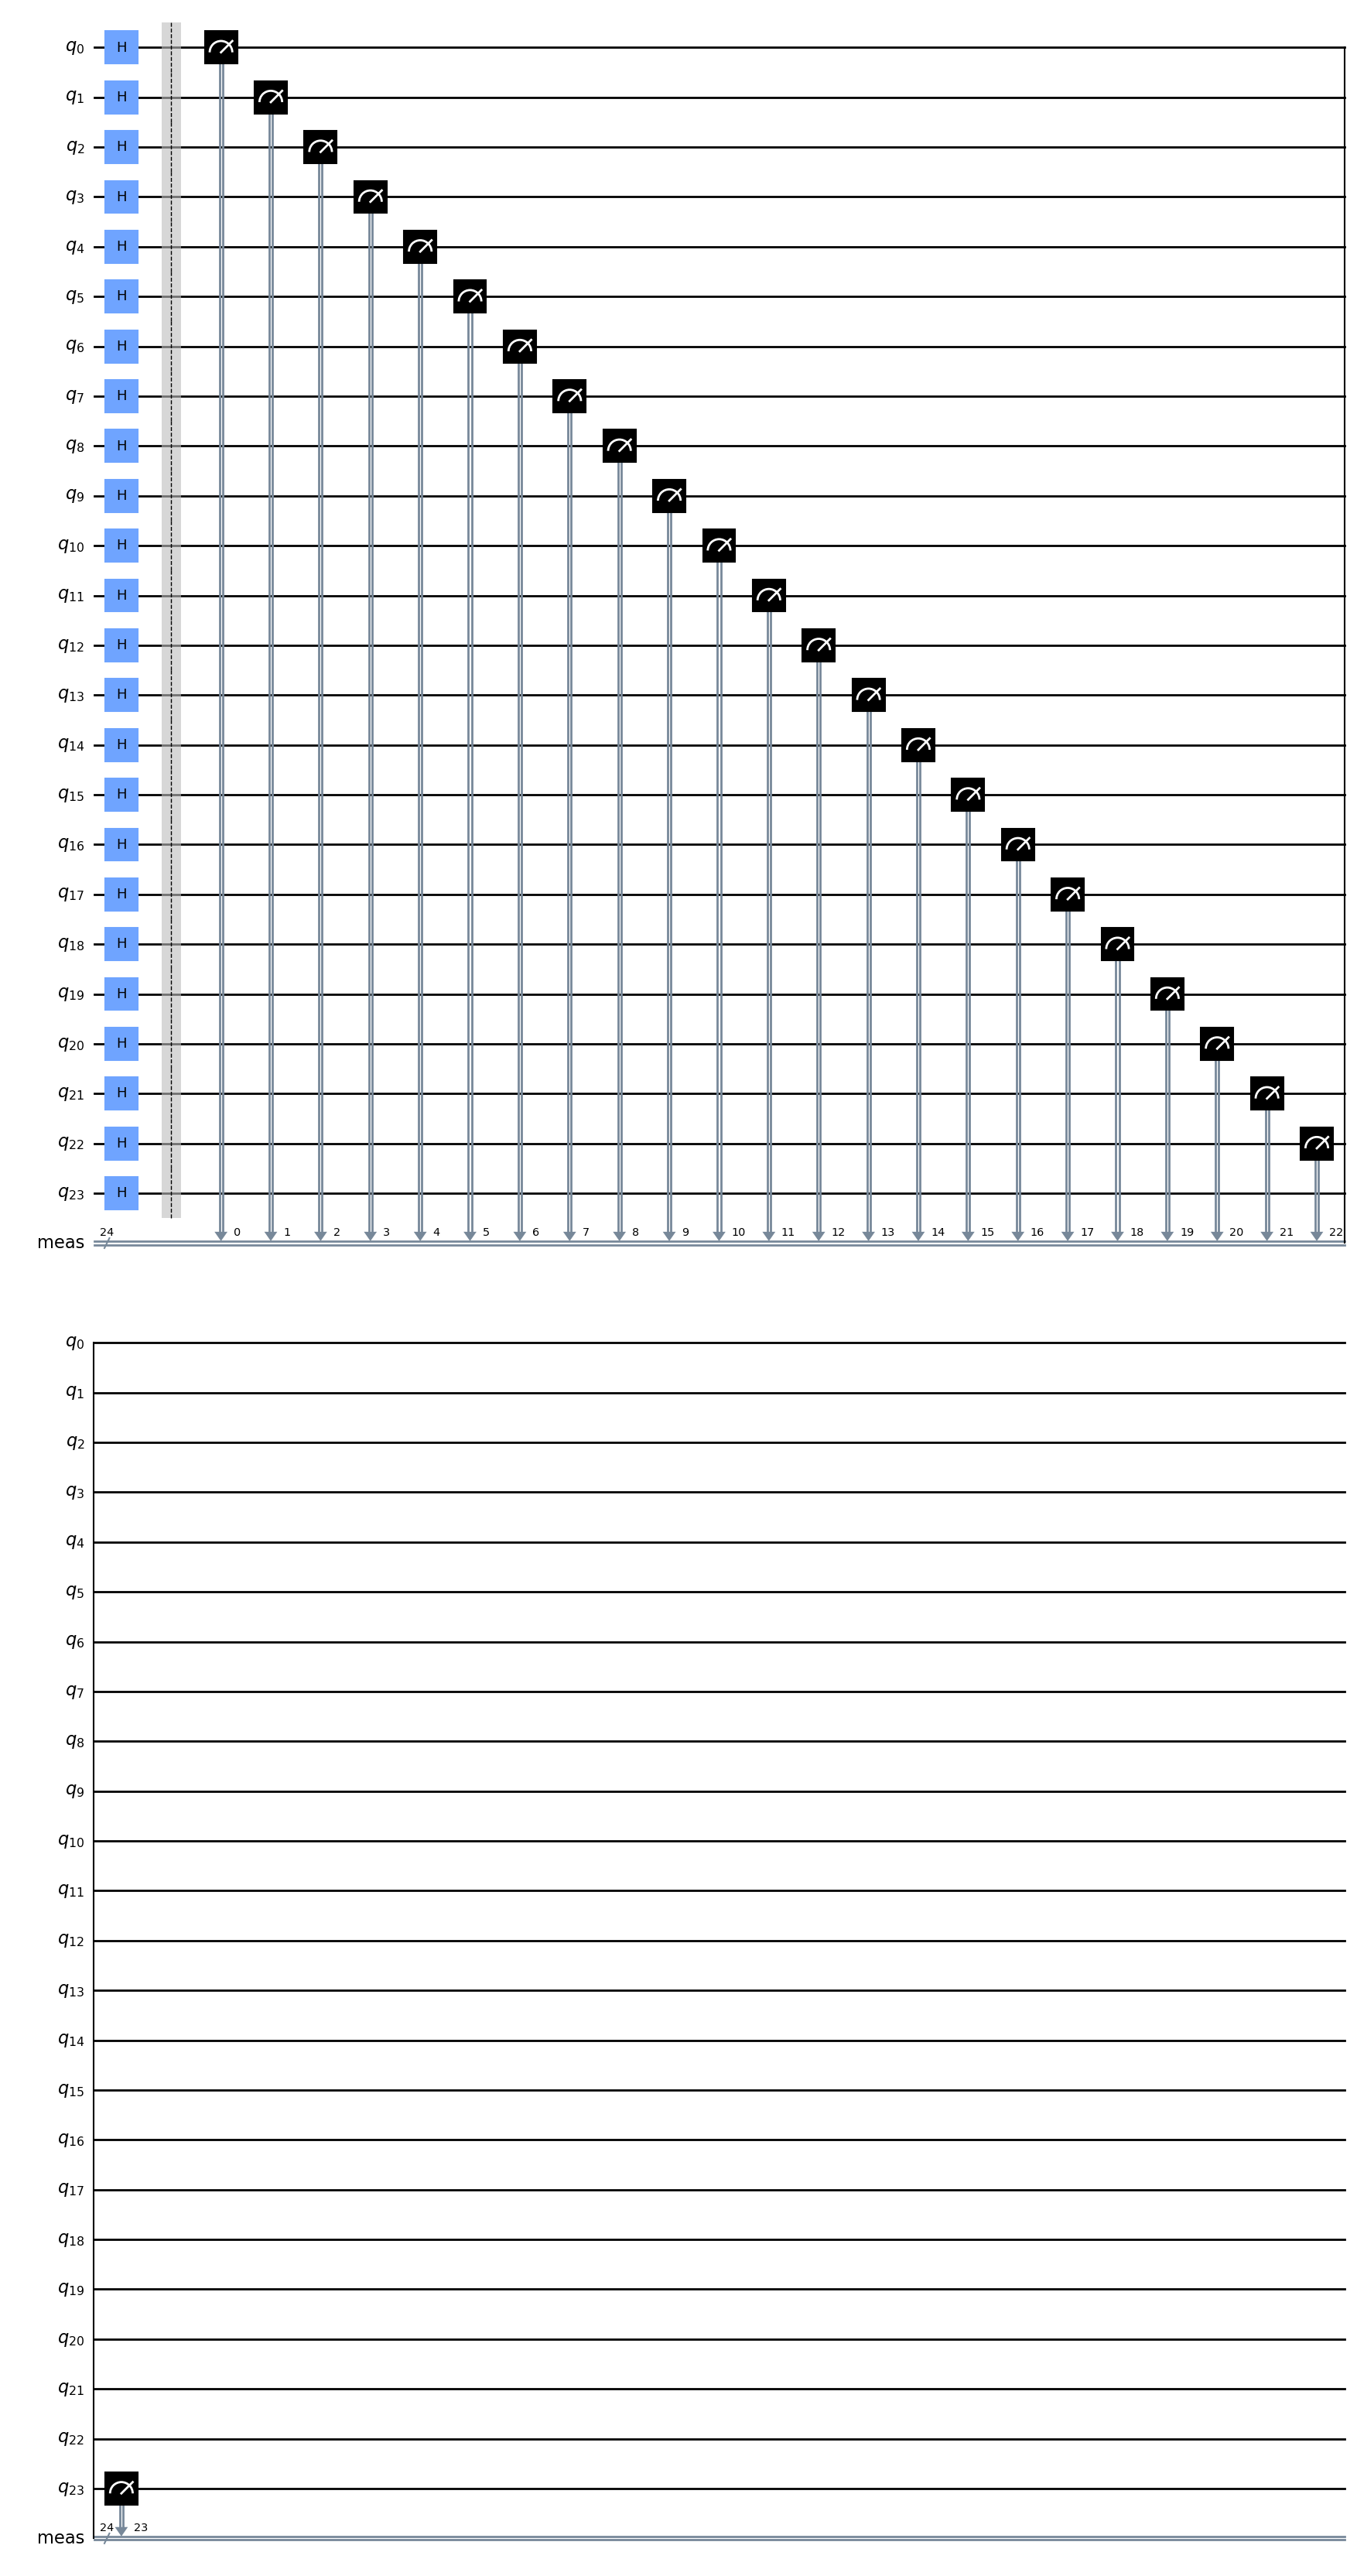

In [94]:
qc_rgb=QuantumCircuit(24)
qc_rgb.h(range(24))
qc_rgb.measure_all()
qc_rgb.draw('mpl')

In [ ]:
qc_rgb_tr = transpile(qc_rgb, backend)
#real_job = backend.run(qc_rgb_tr, shots = 10000, memory=True )
real_job.job_id()

In [97]:
job0 = provider.retrieve_job('ch45ig85ngm0qheaggrg')
#job_monitor(job0)
job0.status()

<JobStatus.DONE: 'job has successfully run'>

In [98]:
result = job0.result().get_memory()

In [99]:
rgb= []
for i in range(10000):
    r = int(result[i][0:8], base=2)
    g = int(result[i][8:16], base=2)
    b = int(result[i][16:24], base=2)
    rgb.append([r, g, b])

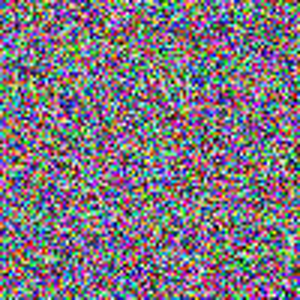

In [100]:
from PIL import Image

img_w, img_h = 100, 100
data = np.zeros((img_h, img_w , 3), dtype=np.uint8)
for i in range(100):
    for j in range(100):
        data[i , j] = rgb[i*100 + j]
scale = 3
img = Image.fromarray(data, 'RGB')
display(img.resize(( int(img.width * scale), int(img.height * scale))))
#display(img)

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 퀴즈 5번과 6번, 7번, 8번을 풀고 노트북 2번으로 돌아옵시다! </div>
